In [3]:
from dateutil.parser import parse
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import norm, kde, kstest
from numpy import inf




%matplotlib inline
sns.set()
pd.set_option('display.max_rows', 2000)
pd.set_option('display.width', 1000)
data_path = "C:\\Users\\augus\\Documents\\405-DataScience\\G_Suite_Metrics\\data\\Gmail\\Gmail_df.csv"
data0 = pd.read_csv(data_path)
data_path_write = 'C:\\Users\\Henry\\Documents\\405-DataScience\\G_Suite_Metrics\\data\\Gmail\\'

In [4]:
data = data0[['time','1day_imap_users']]

In [5]:
data.head()

,time,1day_imap_users
0,2015-03-23 00:00:00-04:00,10463.0
1,2015-03-24 00:00:00-04:00,10510.0
2,2015-03-25 00:00:00-04:00,10453.0
3,2015-03-26 00:00:00-04:00,10496.0
4,2015-03-27 00:00:00-04:00,10419.0


In [6]:
data.describe()

,1day_imap_users
count,1585.000000
mean,9865.966984
std,1731.273048
min,0.000000
25%,9768.000000
50%,10114.000000
75%,10477.000000
max,11849.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021431FB2C18>]],
      dtype=object)

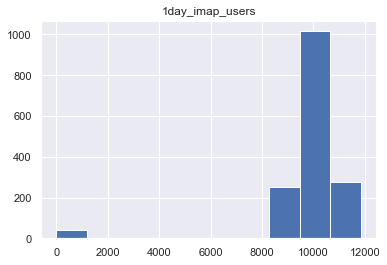

In [7]:
data.hist()

In [8]:
#data = data[(data.T != 0.0).any()]
data = data[data['1day_imap_users'] != 0]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002142E562D30>]],
      dtype=object)

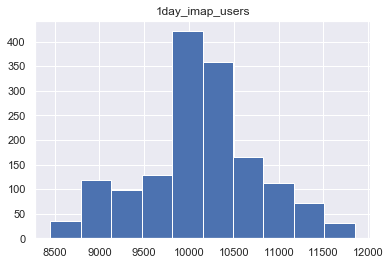

In [9]:
data.hist()

In [10]:
data.describe()

,1day_imap_users
count,1544.000000
mean,10127.951859
std,649.507366
min,8454.000000
25%,9823.500000
50%,10127.000000
75%,10483.750000
max,11849.000000


In [11]:
data['time'] = pd.to_datetime(data['time'],utc=True)
data.set_index('time', inplace=True)


Text(0.5, 0, 'Year')

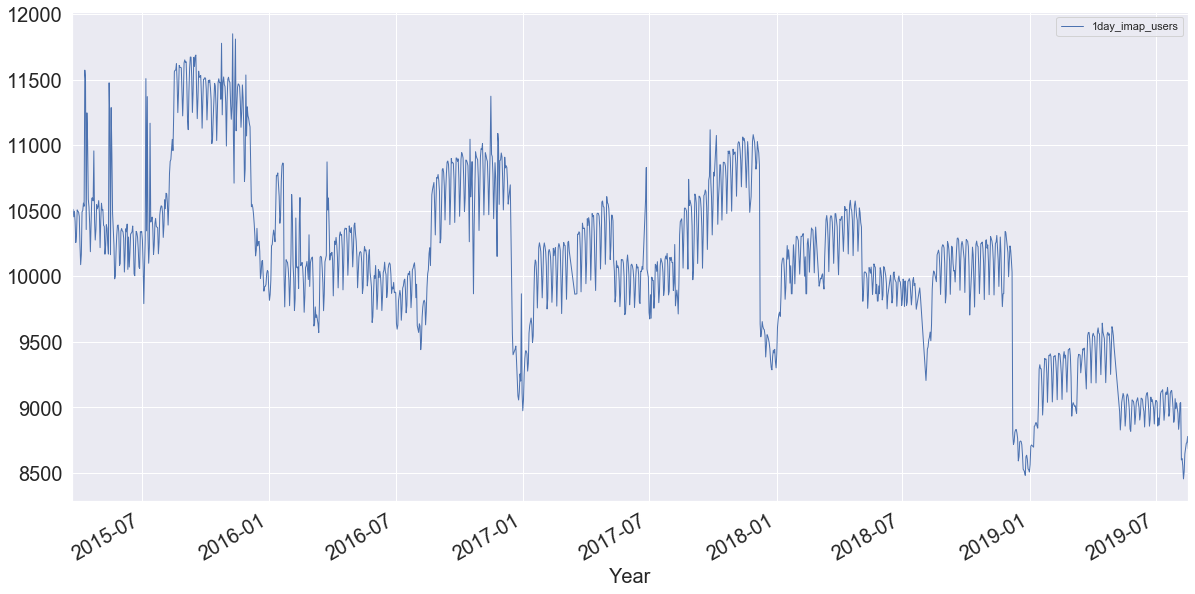

In [12]:
data.plot(figsize=(20,10), linewidth=1, fontsize=20)
plt.xlabel('Year', fontsize=20)

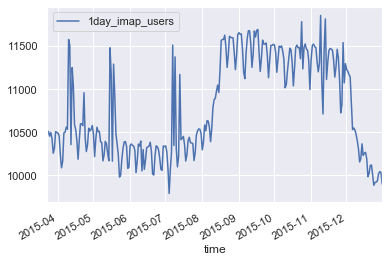

In [13]:
data.loc['2015'].plot()

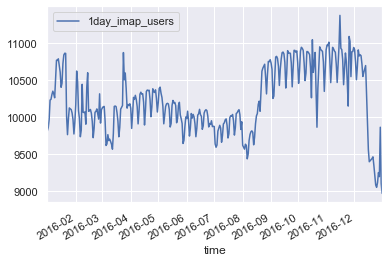

In [14]:
data.loc['2016'].plot()

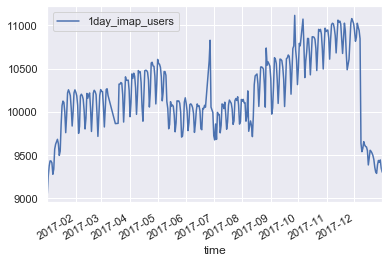

In [15]:
data.loc['2017'].plot()

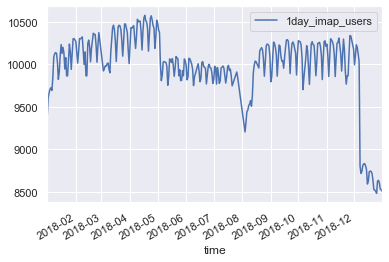

In [16]:
data.loc['2018'].plot()

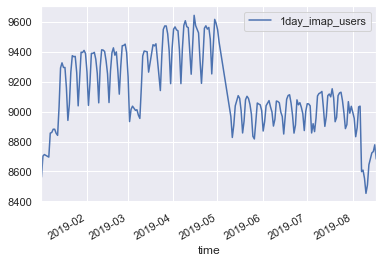

In [17]:
data.loc['2019'].plot()

In [18]:
alpha = norm.fit(data['1day_imap_users'])[0]
beta = norm.fit(data['1day_imap_users'])[1]

In [19]:
oiu = data['1day_imap_users']

In [20]:
density = kde.gaussian_kde(oiu, bw_method=None)

C:\Users\augus\Anaconda3\lib\site-packages\pandas\plotting\_core.py:2477: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  ax.hist(values, bins=bins, **kwds)


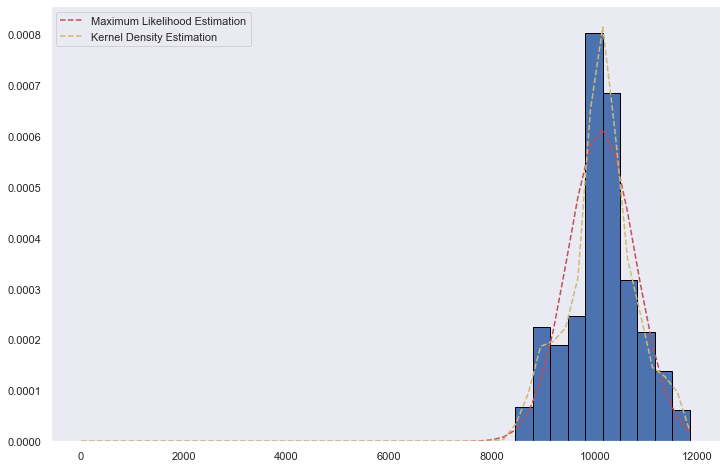

In [21]:
import numpy as np
oiu.hist(normed=True, bins=10, grid=False, ec='black', figsize=(12,8))
x = np.linspace(0, oiu.max())
xgrid = np.linspace(x.min(), x.max(), 100)

#l1, = plt.plot(x, norm.pdf(x, alpha[-1], beta[-1]), 'm-', label="Method Of Moments")
l2, = plt.plot(x, norm.pdf(x, alpha, beta), 'r--', label="Maximum Likelihood Estimation")
l3, = plt.plot(x, density(x), 'y--', label="Kernel Density Estimation")
plt.legend(handles=[l2,l3])

In [22]:
my_cdf = lambda ary: np.array([density.integrate_box_1d(-np.inf, x) for x in ary])


In [23]:
kstest(oiu,my_cdf)

KstestResult(statistic=0.02789962106884608, pvalue=0.17742801225228208)

In [24]:
e = norm(alpha,beta)

In [25]:
kstest(oiu,e.cdf)

KstestResult(statistic=0.0733728546065236, pvalue=1.1277440469701748e-07)